In [1]:
import numpy as np
from numpy.typing import NDArray

import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.lines import Line2D

import superconductivity.api as sc

from superconductivity.api import G_0_muS
from superconductivity.api import NDArray64

from IPython import get_ipython

_ip = get_ipython()
if _ip is not None:
    _ip.run_line_magic("reload_ext", "autoreload")
    _ip.run_line_magic("autoreload", "2")

In [23]:
from superconductivity.utilities.evaluation import *

# measurement stuff
measurement = load_measurement(
    directory="/Users/oliver/Documents/measurement data/25 04 OI-25c-09/",
    file="OI-25c-09 2025-05-02 unbroken stripline irradiation studies 0.hdf5",
    measurement="vna_amplitudes_13.6000GHz",
)
measurement = load_keys(
    measurement,
    indices=(-6, -1),
    zero_key="no_irradiation",
)

data = load_data(
    measurement=measurement,
    amp=(1000, 1000),
)
data = load_voltage_and_current(
    data=data,
    trigger=0,
)
data = do_something(data=data, nu_sampling_Hz=43)
data

{'file': '/Users/oliver/Documents/measurement data/25 04 OI-25c-09/OI-25c-09 2025-05-02 unbroken stripline irradiation studies 0.hdf5',
 'y_keys': ['vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/no_irradiation',
  'vna_amplitudes_13.6000GHz/vna_13.6000GHz_0.010V',
  'vna_amplitudes_1

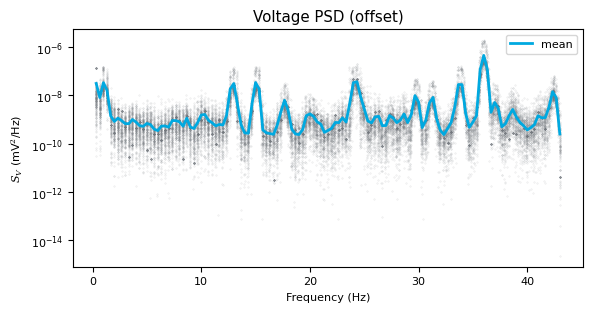

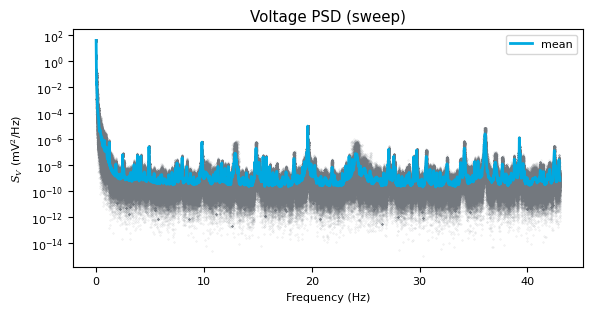

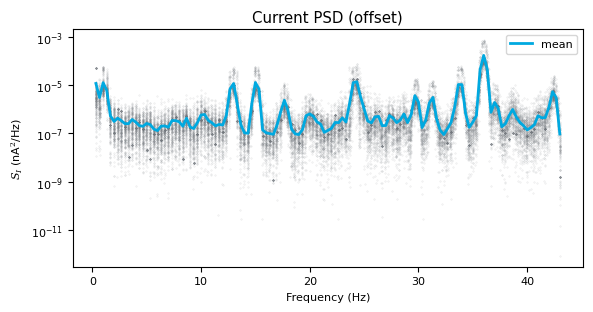

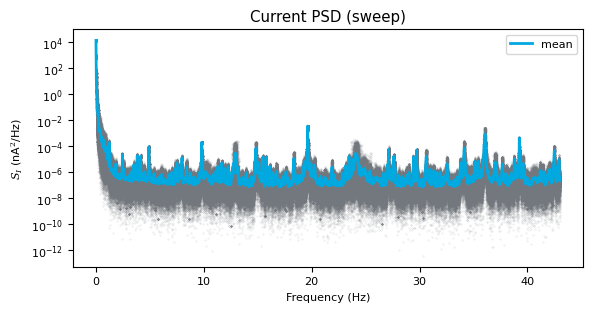

: 

In [ ]:
from superconductivity.utilities.evaluation_plotter import *

# show_measurement(measurement=measurement)
# show_amplifications(data)
show_psd(data=data)

In [6]:
# Get exp data
import sys, importlib, logging

HOME_DIR = "/Users/oliver/Documents/p5control-bluefors-evaluation"
sys.path.append(HOME_DIR)
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.ivevaluation"])
logger = logging.getLogger()
logger.setLevel(level=logging.WARNING)

# Initial guessing parameter
tau_0_arbu: float = 0.18861238619219342
T_0_K: float = 0.3
Delta_0_meV: float = 0.1954362246372233
Gamma_0_meV: float = 0.0073389200475204005

# Data
nu_GHz = 13.6  # n = perfect, slight gap closing
A_mV: NDArray64 = np.arange(0, 1.55, 0.01, dtype="float64")

V_mV: NDArray64 = np.linspace(-2.0, 2.0, 801, dtype="float64")
V_off_range_mV: NDArray64 = np.linspace(-0.045, 0.045, 451, dtype="float64")

I_nA: NDArray64 = np.linspace(-30, 30, 601, dtype="float64")
I_off_range_nA: NDArray64 = np.linspace(-0.35, 0.35, 701, dtype="float64")

# exp_data evaluation
sampling_rate: float = 13.7
window_length: int = 0

# interesting Amplitudes
A_lim_mV: tuple[float, float] = (0, 705)  # mV
A_interest_mV: list[float] = [0, 100, 250, 400]  # mV

eva = IVEvaluation()
eva.file_directory = "/Users/oliver/Documents/measurement data/"
eva.file_folder = "25 04 OI-25c-09/"
eva.file_name = "OI-25c-09 2025-05-02 unbroken stripline irradiation studies 0.hdf5"
eva.sub_folder = ""
eva.title = f"amplitude at {nu_GHz:.1f}GHz"

# eva.setAmplifications(1000, 1000)
# eva.setV(
#     voltage_minimum=np.min(V_mV) * 1e-3,
#     voltage_maximum=np.max(V_mV) * 1e-3,
#     voltage_bins=V_mV.shape[0] - 1,
# )
# eva.eva_current = True
# eva.setI(
#     current_minimum=np.min(I_nA) * 1e-9,
#     current_maximum=np.max(I_nA) * 1e-9,
#     current_bins=I_nA.shape[0] - 1,
# )
# eva.eva_voltage = True

# eva.downsample_frequency = sampling_rate

# eva.setMeasurement(f"vna_amplitudes_{nu_GHz:.1f}000GHz")
# eva.setKeys(index_0=-6, index_1=-1, norm=1e0, to_pop="no_irradiation")
# eva.addKey("no_irradiation", 0)
# eva.addKey("no_irradiation", 0.005)
# (eva.up_sweep,) = eva.getMaps(
#     [1], y_lim=tuple(np.array(A_lim_mV) * 1e-3), skip=(20, None)
# )
# eva.saveData()

eva.loadData()

In [ ]:
eva.up_sweep.keys()

V_bias_mV = eva.mapped["voltage_axis"]
I_bias_nA = eva.mapped["current_axis"]
A_bias_mV = eva.mapped["amplitude_axis"]
eva.up_sweep.keys(), eva.mapped.keys()

(dict_keys(['iv_tuples_raw', 'iv_tuples', 'downsample_frequency', 'temperature', 'time_start', 'time_stop', 'current', 'voltage', 'time_current', 'time_voltage', 'temperature_current', 'temperature_voltage', 'differential_conductance', 'differential_resistance', 'plain']),
 dict_keys(['y_axis', 'voltage_offset_1', 'voltage_offset_2', 'downsample_frequency', 'voltage_minimum', 'voltage_maximum', 'voltage_bins', 'voltage_axis', 'current_minimum', 'current_maximum', 'current_bins', 'current_axis', 'amplitude_minimum', 'amplitude_maximum', 'amplitude_bins', 'amplitude_axis', 'temperature_minimum', 'temperature_maximum', 'temperature_bins', 'temperature_axis', 'upsample_current', 'upsample_voltage', 'upsample_amplitude', 'upsample_temperature', 'eva_current', 'eva_voltage', 'eva_temperature', 'eva_even_spaced']))

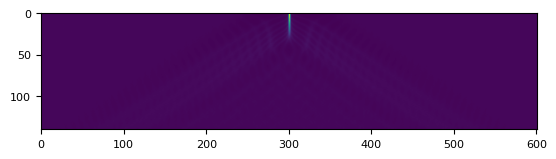

In [7]:
plt.imshow(eva.up_sweep["differential_resistance"])

In [7]:
# # logger.setLevel(level=logging.INFO)
# # eva.showMeasurements()
# # eva.showKeys()

# # plot and load exp data
# %matplotlib inline
# from utilities.ivplot import IVPlot
# importlib.reload(sys.modules["utilities.ivplot"])
# logger = logging.getLogger()
# logger.setLevel(level=logging.WARNING)

# eva = IVPlot()
# eva.title = f"amplitude at {nu_GHz:.1f}GHz"
# eva.sub_folder = ""
# eva.loadData()
# eva.to_plot = eva.up_sweep
# eva.title_of_plot = "Up Sweep"
# eva.y_characters = [r"$A$", "V"]
# eva.dvdi_norm = (1e3, 'k')
# eva.didv_c_lim = (0, 0.4)
# eva.dvdi_c_lim = (0, 0.4e6)
# if window_length >2:
#     eva.smoothing = True
#     eva.window_length = window_length
# else:
#     eva.smoothing = False
# eva.plot_T = False
# eva.plot_dvdis = True
# eva.plot_didvs = True
# eva.plot_all()